<a href="https://colab.research.google.com/github/nascimento-luciano/Artificial-Intelligence/blob/master/Helice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.8944271909999159
p0 = [1 0 2]
p = 2.23606797749979
T0 = [0.4472136  0.         0.89442719]
H = [0. 0. 1.]
N0 = [0. 1. 0.]


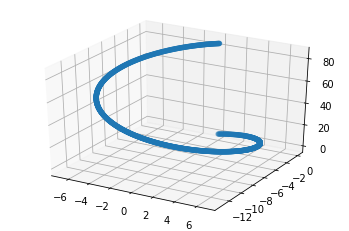

In [1]:
# coding: utf-8

# Calculate and plot charged particle trajectory in homogeneous magnetic field
# Eq. 1 from Nuclear Instruments and Methods in Physics Research A 566 (2006) 687–698
# dx.doi.org/10.1016/j.nima.2006.07.032

import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def M (M0_, gamma_, Q_, theta_, H_, T0_, alpha_, N0_):
    a = gamma_ / Q_ * (theta_-math.sin(theta_))
    c = math.sin(theta_) / Q_
    d = alpha_ / Q_ * (1.0-math.cos(theta_))
    return M0_ + a*H_ + c*T0_ + d*N0_

px = 1
py = 0
pz = 2
p0 = np.array([px, py, pz])
pt = math.sqrt(px*px+py*py)
Field = 0.5
B =  Field*0.3
q = 1.0
M0 = np.array([0,0,0])
Bvecfield = np.array([0,0,1])
H = Bvecfield/np.linalg.norm(Bvecfield)
p = np.linalg.norm(p0)
T0 = p0/p
N0 = np.cross(H,T0)
alpha = np.linalg.norm(N0)
N0 = N0/alpha
gamma = np.dot(H,T0)
print(gamma)
Q = -B*q/p
print("p0 = "+str(p0))
print("p = "+str(p))
print("T0 = "+str(T0))
print("H = "+str(H))

print("N0 = "+str(N0))

s_max=2.0*math.pi*p/B
n_turns=1
x = y = z = np.array([])
for s in np.arange(0,n_turns*s_max,.1):
    theta = Q*s
    position = M(M0, gamma, Q, theta, H, T0, alpha, N0)
    x = np.append(x, position[0])
    y = np.append(y, position[1])
    z = np.append(z, position[2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

plt.show()